<a href="https://colab.research.google.com/github/faizanurrahman/temp_data/blob/master/Lower_Back_Pain_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Understandig

Low back pain is the most common cause of job-related disability. Almost every person experience low back pain in their lifetimes. Most low back pain is the result of an injury, such as muscle sprains or strains due to sudden movements or poor body mechanics while lifting heavy objects. Low back pain can also be the result of certain diseases, such as cancer of the spinal cord, a ruptured or herniated disc, sciatica, arthritis, kidney infections, or infections of the spine.

Low back pain is more likely to occur in individuals between the ages of 30 and 50. This is partly due to the changes that occur in the body with aging. As you grow older, the fluid content between the vertebrae in the spine reduces. This means discs in the spine experience irritation more easily. You also lose some muscle tone, which makes the back more prone to injury. This is why strengthening your back muscles and using good body mechanics are helpful in preventing low back pain.

***Departments that treat this condition-***

- Neurology
- Pain Medicine
- Spine Care

***Areas that research this condition-***

- Neurology Research

This data set is about to identify a person is abnormal or normal using collected physical spine details. Lets go dive into data.

### Understanding of Data


In [0]:
# import required libarary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# reading csv file.
df = pd.read_csv("Dataset_spine.csv")
df.head(5)

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [0]:
# removing Unnamed:13 columns
df.drop(columns=['Unnamed: 13'], inplace=True)

# changing columns name
columns_dict = {
"Col1" : "pelvic_incidence",
"Col2" : "pelvic_tilt",
"Col3" : "lumbar_lordosis_angle",
"Col4" : "sacral_slope",
"Col5" : "pelvic_radius",
"Col6" : "degree_spondylolisthesis",
"Col7" : "pelvic_slope",
"Col8" : "direct_tilt",
"Col9" : "thoracic_slope",
"Col10" :"cervical_tilt",
"Col11" : "sacrum_angle",
"Col12" : "scoliosis_slope",
"Class_att" : "class"}

df.rename(columns = columns_dict, inplace = True)

df.head(5)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [0]:
# seperating feature and class variable
feature = df.columns[:-1].values
target = df.columns[-1]

# converting target to numeric
def cat_to_numeric(x):
  if x == 'Abnormal':
    return 1
  elif x == 'Normal':
    return 0
  else:
    return -1
df[target] = df[target].apply(cat_to_numeric)

df.shape

(310, 13)

This dataset contain :
- 310 observation
-12 feature variable
- 1 target variable

In [0]:
# checking datatype of each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
class                       310 non-null int64
dtypes: float64(12), int64(1)
memory usage: 31.6 KB


In [0]:
# cheking descriptive statistics of dataset
df.describe()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,0.677419
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,0.468220
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,0.000000
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,0.000000
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,1.000000
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,1.000000
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200,1.000000


Look like there is some outlier in dataset in some columns like degree_spondylolisthesis, sacral_slope. because mean value of some columns varied large from min and max value.

## Data Preprocessing

### Data Cleaning and EDA


In [0]:
# Checking Null Values
df.isnull().sum(axis = 1).any()

False

dataset contain no null value

Text(0, 0.5, ' feature value')

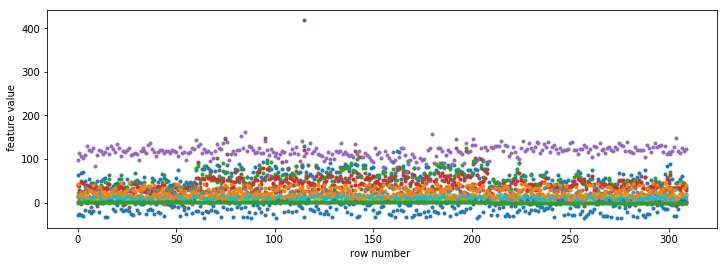

In [0]:
# Checking any redundant feature
plt.subplots(figsize=(12, 4))
plt.plot(df, '.')
plt.xlabel("row number ")
plt.ylabel(" feature value")

horizontal pattern shows that there are some feature which are redundant or constant.

Text(0.5, 1.0, ' class distribution')

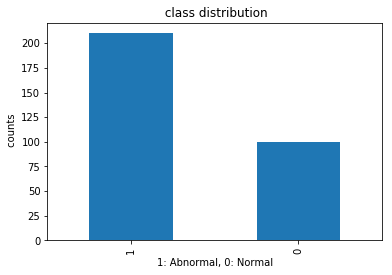

In [0]:
# Cheking Class Distribution.
df[target].value_counts().plot.bar()
plt.xlabel("1: Abnormal, 0: Normal")
plt.ylabel(" counts")
plt.title(" class distribution")


class distribution is not balanced, we have to apply either upsampling or downsampling. dataset not huge so we apply upsampling.

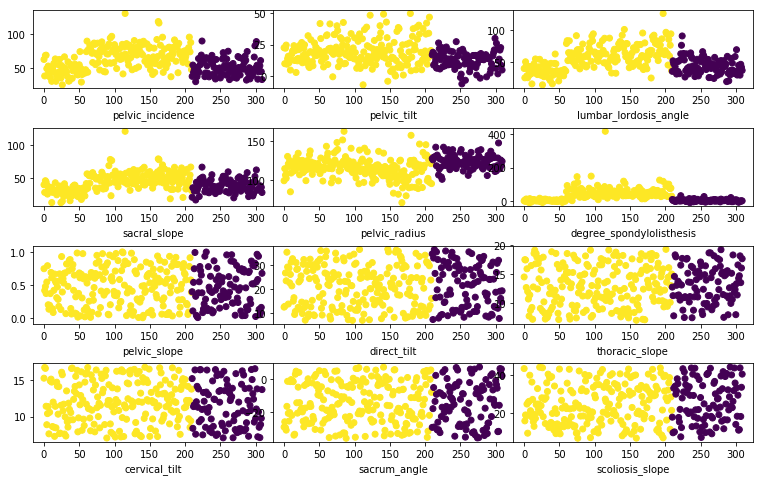

In [0]:
# checking class distribution within each feature.
fig = plt.figure(figsize=(10, 6))
for i in range(12):
  plt.subplot(4, 3, (i+1))
  plt.scatter(range(len(df)), df[feature].iloc[:, i], c=df[target])
  plt.xlabel(feature[i])
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.001)
  

In [0]:
# checking Duplicated and constant feature
print(df.nunique(axis = 0))
print(df.nunique(axis = 1).all())


pelvic_incidence            310
pelvic_tilt                 310
lumbar_lordosis_angle       280
sacral_slope                281
pelvic_radius               310
degree_spondylolisthesis    310
pelvic_slope                310
direct_tilt                 310
thoracic_slope              310
cervical_tilt               310
sacrum_angle                310
scoliosis_slope             310
class                         2
dtype: int64
True


there are no constant value in row or columns. Almost all columns have unique value.

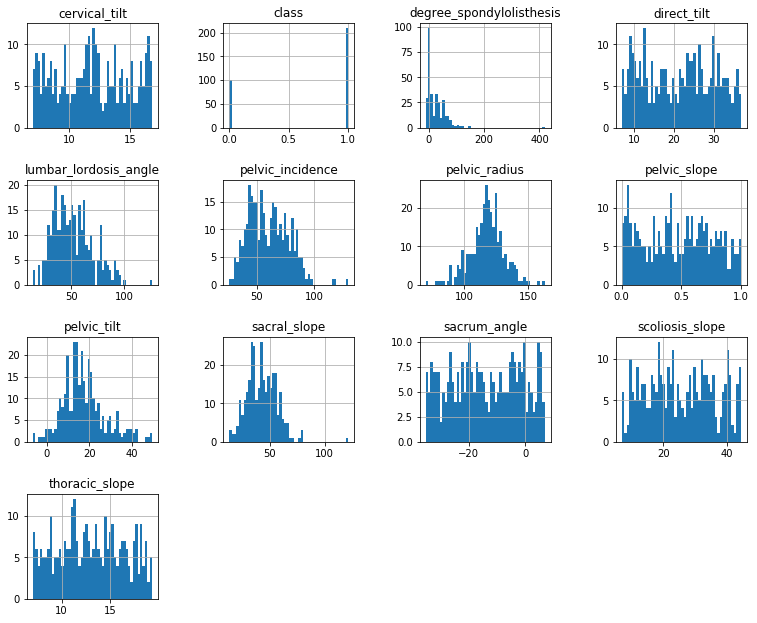

In [0]:
# checking histogram of individuals
df.hist(figsize=(10,8),bins = 50)
plt.title("Features Distribution")
plt.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.5, wspace=0.5)
  

degree_spondylolisthesis has right skewed distribution, so we take logrithmic scale of it.

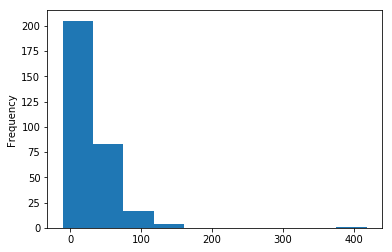

In [0]:
df['degree_spondylolisthesis'].plot.hist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


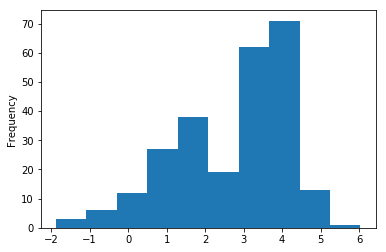

In [0]:
# taking logrithmic scale
df['degree_spondylolisthesis'] = np.log(df['degree_spondylolisthesis'])
df['degree_spondylolisthesis'].plot.hist()

In [0]:
df['degree_spondylolisthesis'].isnull().sum()

58

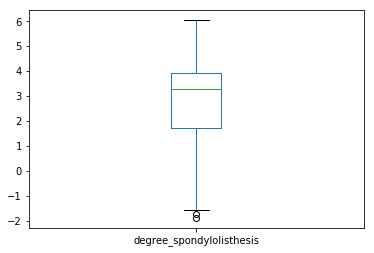

In [0]:
df['degree_spondylolisthesis'].plot.box()

In [0]:
feature = df[['degree_spondylolisthesis']].dropna()
first_q = np.percentile(feature, 25)
third_q = np.percentile(feature, 75) 
IQR = third_q - first_q
IQR *= 1.5
minimum = first_q - IQR 
maximum = third_q + IQR
fill_value = np.mean((minimum, maximum))-minimum
df[['degree_spondylolisthesis']] = df[['degree_spondylolisthesis']].fillna(value=fill_value)
df['degree_spondylolisthesis'].isnull().sum()


0

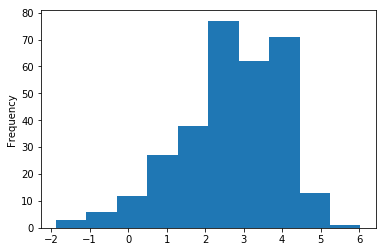

In [0]:
df['degree_spondylolisthesis'].plot.hist()

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 1080x432 with 0 Axes>

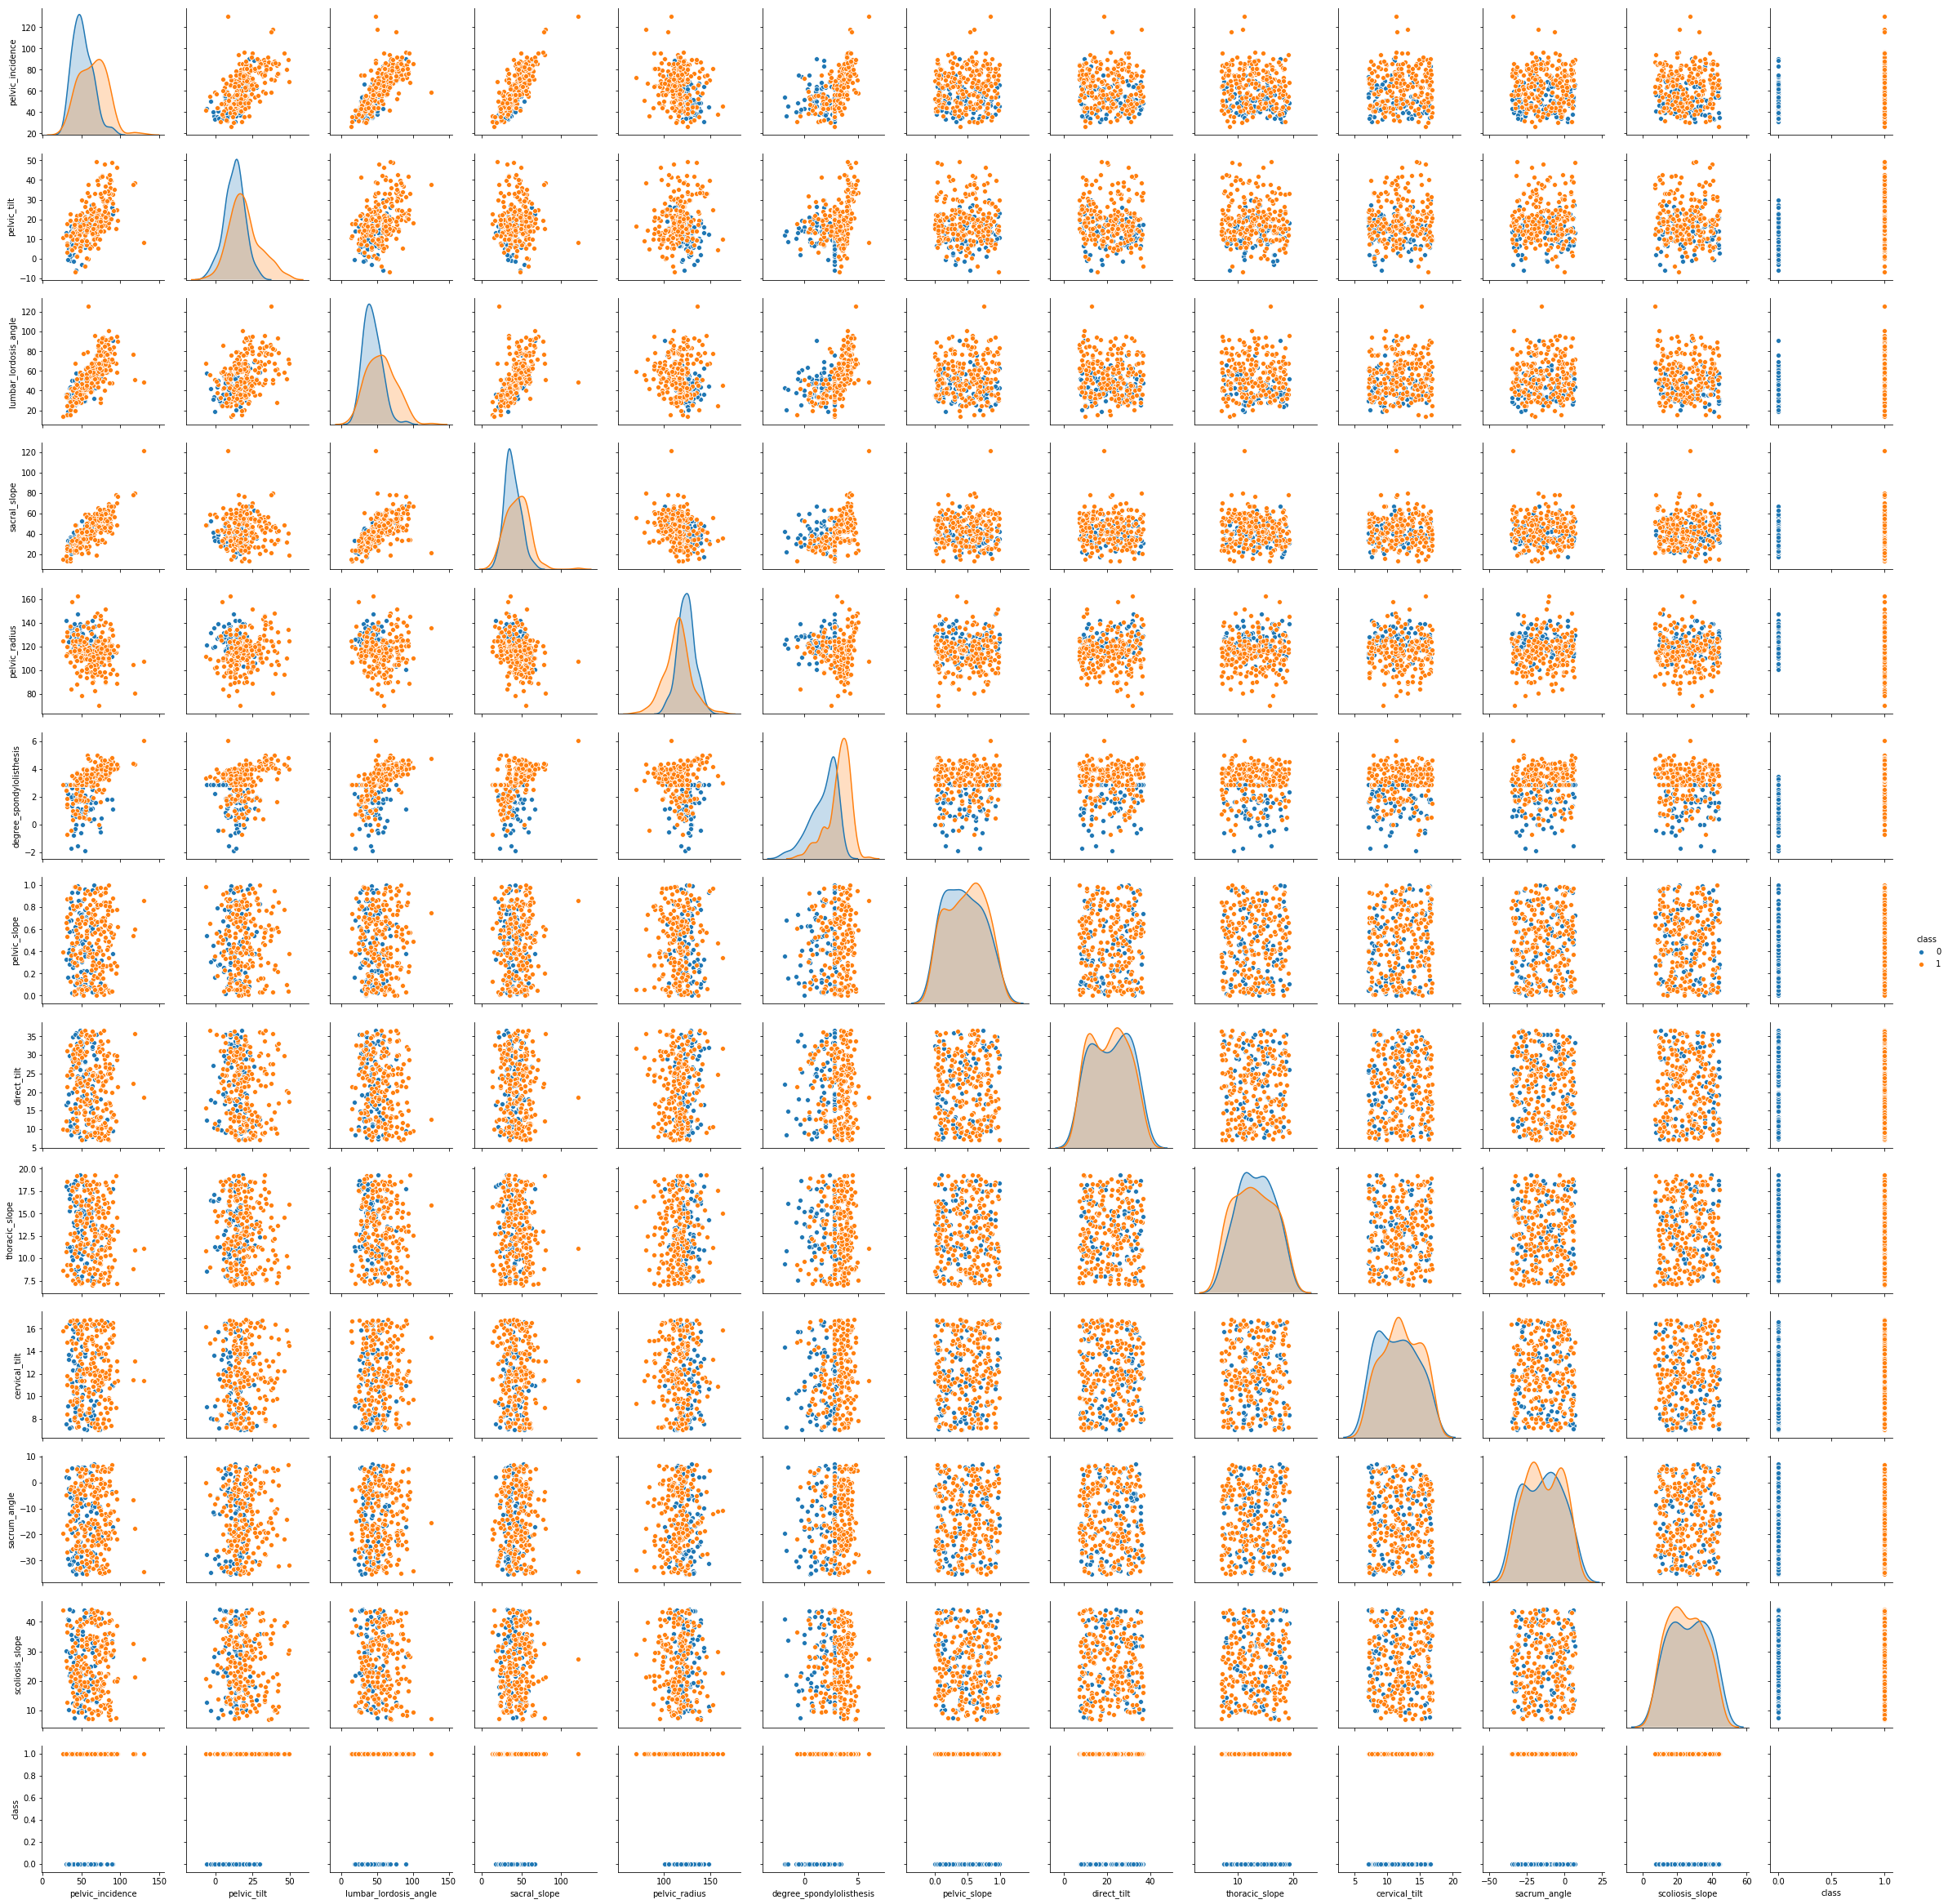

In [0]:
# cheking pair plot
plt.figure(figsize=(15, 6))
sns.pairplot(df, hue='class')

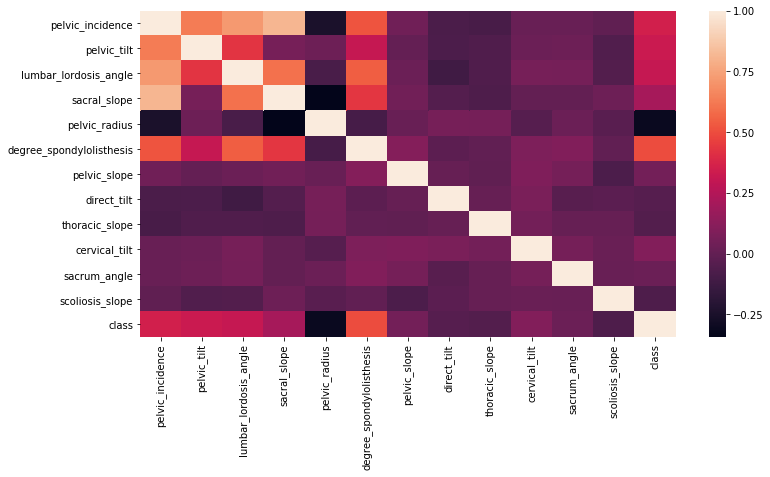

In [0]:
# ploting correlation matrix
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr())

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 13 Text xticklabel objects>)

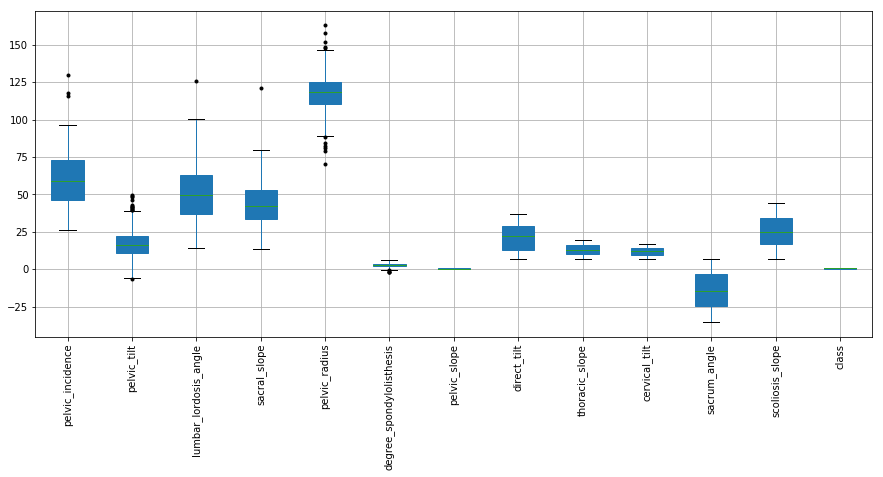

In [0]:
# checking outliers and remove it.
plt.subplots(figsize=(15,6))
df.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

In [0]:
pelvic_radius_class = df[['pelvic_radius', 'class']]
pelvic_radius_class.corr()

,pelvic_radius,class
pelvic_radius,1.000000,-0.309857
class,-0.309857,1.000000


In [0]:
def  remove_outlier(feature):
    first_q = np.percentile(X[feature], 25)
    third_q = np.percentile(X[feature], 75)
    IQR = third_q - first_q
    IQR *= 1.5
    minimum = first_q - IQR
    maximum = third_q + IQR
    median = X[feature].median()
    X.loc[X[feature] < minimum, feature] = median 
    X.loc[X[feature] > maximum, feature] = median


X = df.iloc[:, :-1]
for i in range(len(X.columns)): 
        remove_outlier(X.columns[i])

In [0]:
for i in range (3):
    for i in range(len(X.columns)):
        remove_outlier(X.columns[i])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

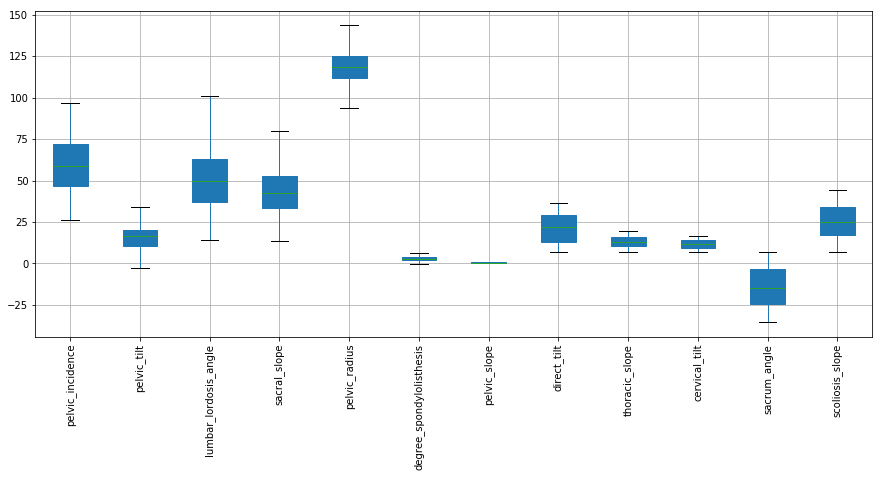

In [0]:
plt.subplots(figsize=(15,6))
X.boxplot(patch_artist=True, sym="k.")
plt.xticks(rotation=90)

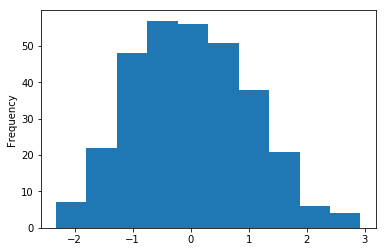

In [0]:
X['sacral_slope'].plot.hist()

In [0]:
pelvic_radius_class['pelvic_radius'] = X[['pelvic_radius']]
pelvic_radius_class.corr()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,pelvic_radius,class
pelvic_radius,1.000000,-0.344681
class,-0.344681,1.000000


### Feature Engineering

In [0]:
X['Lumbar_angle'] = X['lumbar_lordosis_angle'] + X['sacrum_angle']
X['overhang'] = X['pelvic_incidence']*X['direct_tilt']+X['pelvic_tilt']
X.shape

(310, 14)

In [0]:
#stats = X.groupby('pelvic_slope')['overhang', 'pelvic_incidence', 'pelvic_tilt', 'sacral_slope'].agg(['mean'])
#stats.columns = ['mean_overhang', 'pelvic_incidence_mean', 'mean_tilt', 'mean_sacral_slope']
#X.merge(stats, left_on = 'Lumbar_angle', right_index=True, how = 'left').head(10)

In [0]:
#X['pelvic_incidence'] = pd.qcut(X.pelvic_incidence, q=100, labels=False )
#X['Lumbar_angle'] = pd.qcut(X.Lumbar_angle, q = 10, labels=False)
#data['CatFare']= pd.qcut(data.Fare, q=4, labels=False)

In [0]:
#X.drop(columns=['direct_tilt', 'pelvic_incidence'], inplace = True)

### Standardization of features

In [0]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
scaled_df = pd.DataFrame(data = scaled_data, columns = X.columns)
X = scaled_df
y = df[['class']].values
scaled_df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Lumbar_angle,overhang
0,0.194678,0.875134,-0.669319,-0.175980,-1.874433,-0.032316,0.951630,-1.015066,0.434293,1.167129,-1.196587,1.712368,-1.191969,-0.775900
1,-1.292891,-0.816078,-1.478179,-1.084438,-0.375826,-1.174688,-0.202553,-0.977816,1.316291,1.679551,-0.940325,-0.913941,-1.704196,-1.278965
2,0.554872,0.829901,-0.088292,0.309799,-1.177905,-0.032316,0.006694,0.639127,1.302680,1.635969,-1.227178,-0.615686,-0.740328,0.985897
3,0.583728,1.159488,-0.408703,0.153943,-1.570037,-0.399220,-0.363213,0.259554,-0.105211,-0.176157,-1.345020,-0.652989,-1.062844,0.631827
4,-0.631614,-0.871440,-1.295164,-0.208779,-0.969906,-0.699282,0.246670,1.643094,0.851472,-1.059666,-0.190502,-0.069858,-1.147813,0.827013


### Model Building

In [0]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
clf_gnb = GaussianNB()
pred_gnb = clf_gnb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_gnb, y_test)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7564102564102564

In [0]:
clf_svc = SVC(kernel="linear")
pred_svc = clf_svc.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_svc, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7692307692307693

In [0]:
clf_xgb =  XGBClassifier()
pred_xgb = clf_xgb.fit(X_train, y_train).predict(X_test)
accuracy_score(pred_xgb, y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7948717948717948

### Model Evaluation

Text(0.5, 15.0, 'Predicted label')

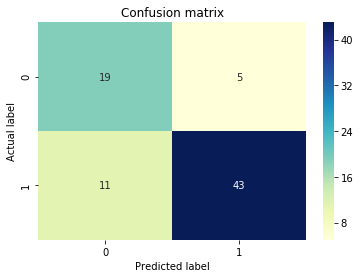

In [0]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, pred_xgb)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70        24
           1       0.90      0.80      0.84        54

    accuracy                           0.79        78
   macro avg       0.76      0.79      0.77        78
weighted avg       0.82      0.79      0.80        78



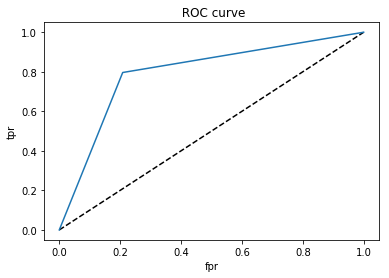

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba = pred_xgb
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Xgb')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(' ROC curve')
plt.show()

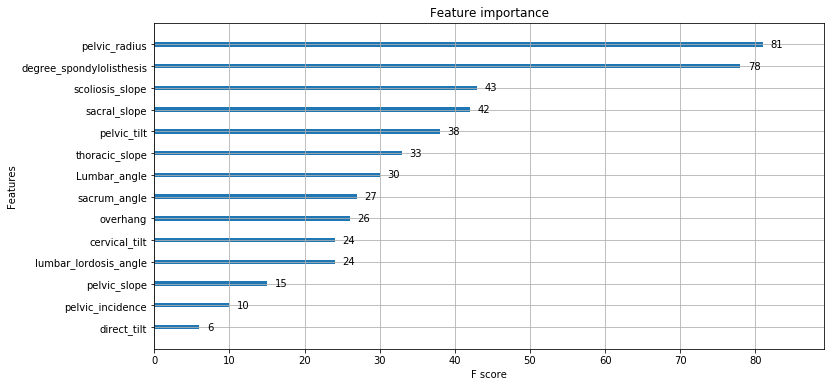

In [0]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_importance(clf_xgb, ax=ax)

In [0]:
#Random Forest technique

from sklearn.ensemble import RandomForestClassifier

#One question that we commonly think of
#How many trees should we use?
#Let's tune this hyperparameter

#Techniquely, the more trees we use, the precise outcome we would get
x_train2,x_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.3,random_state=15)


#Generate forests containing 10(default), 50, 100, 200, 300 trees
n_trees = [50,100,200,300, 400]
for i in n_trees:
    ran_for = RandomForestClassifier(n_estimators=i)
    ran_for.fit(x_train2,y_train2)
    pred = ran_for.predict(x_test2)
    
    print('n of trees: {}'.format(i))
    #Each time of prediction,the accuracy is measured
    correct_pred = 0
    for j,k in zip(y_test2,pred):
        if j == k:
            correct_pred += 1
    print('correct predictions: {}'.format(correct_pred/len(y_test2) *100))
    matrix = pd.DataFrame(confusion_matrix(y_test2,pred),columns=['Abmormal','Normal'],index=['Abnormal','Normal'])
    print(matrix)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


n of trees: 50
correct predictions: 84.94623655913979
          Abmormal  Normal
Abnormal        20       8
Normal           6      59
n of trees: 100
correct predictions: 79.56989247311827
          Abmormal  Normal
Abnormal        18      10
Normal           9      56
n of trees: 200
correct predictions: 80.64516129032258
          Abmormal  Normal
Abnormal        18      10
Normal           8      57


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


n of trees: 300
correct predictions: 81.72043010752688
          Abmormal  Normal
Abnormal        19       9
Normal           8      57


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


n of trees: 400
correct predictions: 79.56989247311827
          Abmormal  Normal
Abnormal        18      10
Normal           9      56
